In [1]:
#importing required libraries for assignment
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup

In [2]:
#helper function for get_name_heights, our main function we'll be using to scrape and process data
#this is just to replace all -'s in the code with the average of the total for the list.

def avger(heights):
  total = 0

  #finding average, if the variable in list of lengths isn't '-', we add to the total variable
  for j in range(0, len(heights)):
    if heights[j] != '-':
      total += heights[j]

  avg = total/len(heights) 

  #replacing the value of '-' with the average of the list in heights
  for k in range(0, len(heights)):
    if heights[k] == '-':
      heights[k] = round(avg,1)
  return heights


In [3]:
def get_name_heights(url):
  soup = BeautifulSoup(requests.get(url).content, 'html.parser')

  #scraping heights, names
  raw_heights = soup.find_all('td', class_ = 'height')
  raw_names = soup.find_all('div', {'class':'sidearm-roster-player-name'})

  #creating empty list heights,names
  heights = []
  names = []

  #iterating through raw names, looking for non-empty divs that contain players in roster
  for raw_name in raw_names:
    if len(raw_name) >= 2:
      names.append(raw_name.find('a').text)

  for raw_height in raw_heights:
    i = raw_height.get_text()

    #avoiding error with -'s, by adding them into the list, heights.
    if i == '-':
      heights.append(i)
      continue

    #converting the strings to floats of inches for heights that aren't '-'
    feet = float(i.split('-')[0]) * 12
    inches = float(i.split('-')[1])
    total = feet + inches 
    heights.append(total)

  #using our helper function from above for easier reading for this function
  avger(heights)

  #converting to a dataframe
  df = pd.DataFrame()
  df['names'] = names
  df['heights'] = heights
  return df

1. Scrape data and compile a dataframe of all the names and heights of the players on the
men’s swimming teams. Output this data as a csv file.


In [4]:
mens_swimming = [
  'https://csidolphins.com/sports/mens-swimming-and-diving/roster',
  'https://yorkathletics.com/sports/mens-swimming-and-diving/roster',
  'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster',
  'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster',
  'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster',
  'https://mckbearcats.com/sports/mens-swimming-and-diving/roster',
  'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster',
  'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster',
  'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22',
  'https://albrightathletics.com/sports/mens-swimming-and-diving/roster'
]

In [5]:
#create empty dataframe, swimming
m_swimming = pd.DataFrame()

#concat all urls of men's swimming teams into a single dataframe, swimming
for i in range(len(mens_swimming)):
  df = get_name_heights(mens_swimming[i])
  m_swimming = pd.concat([m_swimming,df])

m_swimming

,names,heights
0,Daniel Angulo,63.9
1,Anthony Attenborough,70.0
2,Charles Cusumano,64.0
3,Eslam Hussein,70.0
4,Chris Ivanov,75.0
...,...,...
5,Kieran Hassard,72.0
6,Anthony Laite,69.0
7,Drew MacDonald,72.0
8,Kyle Morken,73.0


In [7]:
# converting dataframe to csv file, mens_swimming

m_swimming.to_csv(r'mens_swimming.csv',index=False)

2. Scrape data and compile a dataframe of all the names and heights of the players on the
women’s swimming teams. Output this data as a csv file.


In [6]:
womens_swimming = [
'https://csidolphins.com/sports/womens-swimming-and-diving/roster',
'https://queensknights.com/sports/womens-swimming-and-diving/roster',
'https://yorkathletics.com/sports/womens-swimming-and-diving/roster',
'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim',
'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster',
'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster',
'https://mckbearcats.com/sports/womens-swimming-and-diving/roster',
'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster',
'https://keanathletics.com/sports/womens-swimming-and-diving/roster',
'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster'
]

In [7]:
#create empty dataframe, w_swimming
w_swimming = pd.DataFrame()

#concat all urls of women's swimming teams into a single dataframe, w_swimming
for i in range(len(womens_swimming)):
  df = get_name_heights(womens_swimming[i])
  w_swimming = pd.concat([w_swimming,df])
  
w_swimming

,names,heights
0,Kathleen Bridgman,65.0
1,Angye Galan,43.8
2,Jessica Johnson,68.0
3,Macy Jones-Busch,43.8
4,Bridget Mulvey,67.0
...,...,...
14,Paige Splendido,65.0
15,Emma Stephenson,67.0
16,Callie Stinson,64.0
17,Jessie Triller,62.0


In [10]:
# converting dataframe to csv file, womens_swimming

w_swimming.to_csv(r'womens_swimming.csv',index=False)

3. Scrape data and compile a dataframe of all the names and heights of the players on the
men’s volleyball teams. Output this data as a csv file.


In [8]:
mens_volleyball = [
'https://ccnyathletics.com/sports/mens-volleyball/roster',
'https://lehmanathletics.com/sports/mens-volleyball/roster',
'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster',
'https://johnjayathletics.com/sports/mens-volleyball/roster',
'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster',
'https://mecathletics.com/sports/mens-volleyball/roster',
'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster',
'https://yorkathletics.com/sports/mens-volleyball/roster',
'https://ballstatesports.com/sports/mens-volleyball/roster'
]

In [9]:
#create empty dataframe
m_volleyball = pd.DataFrame()

#concat all urls of mens_volleyball teams into a single dataframe
for i in range(len(mens_volleyball)):
  df = get_name_heights(mens_volleyball[i])
  m_volleyball = pd.concat([m_volleyball,df])

m_volleyball

,names,heights
0,Jeffrey Celis,69.0
1,Reng Chen,69.0
2,Edwin Fierros Gaytan,68.0
3,Fred De La Cuadra,70.0
4,Utpal Chand,69.0
...,...,...
16,Brandon Shepherd,74.0
17,Kevin Doran,79.0
18,Sammy Adkisson,69.0
19,Lucas Biondi,78.0


In [13]:
# converting dataframe to csv file, mens_volleyball

m_volleyball.to_csv(r'mens_volleyball.csv',index=False)

4. Scrape data and compile a dataframe of all the names and heights of the players on the
women’s volleyball teams. Output this data as a csv file

In [10]:
womens_volleyball = [
'https://bmccathletics.com/sports/womens-volleyball/roster',
'https://yorkathletics.com/sports/womens-volleyball/roster',
'https://hostosathletics.com/sports/womens-volleyball/roster',
'https://bronxbroncos.com/sports/womens-volleyball/roster/2021',
'https://queensknights.com/sports/womens-volleyball/roster',
'https://augustajags.com/sports/wvball/roster',
'https://flaglerathletics.com/sports/womens-volleyball/roster',
'https://pacersports.com/sports/womens-volleyball/roster',
'https://www.golhu.com/sports/womens-volleyball/roster'
]

In [11]:
#create empty dataframe
w_volleyball = pd.DataFrame()

#concat all urls of womens_volleyball teams into a single dataframe
for i in range(len(womens_volleyball)):
  df = get_name_heights(womens_volleyball[i])
  w_volleyball = pd.concat([w_volleyball,df])

w_volleyball

,names,heights
0,Jaylina Kraker,59.0
1,Kaylin Nieves,62.0
2,Alyssa Duran,65.0
3,Vielka De Jesus Segura,67.0
4,Nolverys Fernandez,65.0
...,...,...
13,Hannah Lingold,70.0
14,Meghan Tennant,75.0
15,Samantha Arens-Ennis,65.0
16,Krystal Heffelfinger,71.0


In [16]:
# converting dataframe to csv file, womens_volleyball
w_volleyball.to_csv(r'womens_volleyball.csv',index=False)

5. Find the average height in each of the 4 dataframes (so you should have 4 averages in
total). Print these values in your program and include them in your report.


In [12]:
m_swim_avg = round(m_swimming['heights'].mean(),2)
w_swim_avg = round(w_swimming['heights'].mean(),2)
m_vb_avg = round(m_volleyball['heights'].mean(),2)
w_vb_avg = round(w_volleyball['heights'].mean(),2)

avg_hts = pd.DataFrame(
  {
    'team': ['mens_swimming','womens_swimming','mens_volleyball','womens_volleyball'],
    'avg' : [m_swim_avg,w_swim_avg,m_vb_avg,w_vb_avg]
  }
)
avg_hts

,team,avg
0,mens_swimming,71.47
1,womens_swimming,65.07
2,mens_volleyball,72.05
3,womens_volleyball,67.16


6. Find the names and the heights of the 5 tallest and the 5 shortest swimmers and
volleyball players for both the men’s and women’s teams. That is you must have 8 lists in
total: tallest men swimmers, tallest men volleyball players, tallest women swimmers,
tallest women volleyball players, shortest men swimmers, shortest men volleyball
players, shortest women volleyball players, shortest women swimmers. Print these
names and heights ONLY in your program. Do not include them in your report.


In [95]:
def tall_filter(df):
  #get all unique values within the height for the dataframes
  uniques = set(df['heights'].unique())
  uniques = sorted(uniques, reverse=True)

  #get the tallest 5 heights
  top5 = uniques[4]
  
  #filter the input dataframe for all values greater than 5
  filter = df['heights'] >= top5
  filtered = df[filter]
  return filtered

In [94]:
def short_filter(df):
  #get all unique values within the height for the dataframes
  uniques = set(df['heights'].unique())
  uniques = sorted(uniques)
  
  #get the shortest 5 heights
  bot5 = uniques[4]
  
  #filter the input dataframe for all values less than 5
  filter = df['heights'] <= bot5
  filtered = df[filter]
  return filtered

In [96]:
#tallest men swimmers (5 heights)
tall_filter(m_swimming).sort_values(by='heights',ascending=False)

,names,heights
9,Colton Grimes,78.0
15,Josh Templeton,78.0
5,Kasper Gacek,77.0
13,Eric Kroon,77.0
4,Jerry Brown,77.0
16,Zach Linder,77.0
1,Owen Brubaker,76.0
23,Xander Skinner,76.0
24,Evan Root,76.0
25,Gavin Wagner,76.0


In [82]:
#shortest men swimmers (5 heights)
short_filter(m_swimming).sort_values(by='heights')

,names,heights
1,David Greenwald,57.2
0,Daniel Angulo,63.9
2,Charles Cusumano,64.0
3,Eric Li,64.0
4,Joseph Scarpetta,65.0
5,Samuel De Leon,65.0
15,Ben Sionov,66.0
11,James Llewellyn,66.0
4,Zachary Ciriaco,66.0
7,Christopher Egan,66.0


In [84]:
#tallest women swimmer (5 heights)
tall_filter(w_swimming).sort_values(by='heights',ascending=False)

,names,heights
6,Kamilla Shulanova,72.0
6,Hallie Dixon,71.0
7,Isabella Gable,71.0
3,Claire Brouillet,71.0
11,Presley Heitzmann,71.0
15,Haley Rey,71.0
10,Shelby Kasse,70.0
1,Erin Clune,70.0
12,Stephanie Marks,70.0
2,Elle Christie,69.0


In [85]:
#shortest women swimmer (5 heights)
short_filter(w_swimming).sort_values(by='heights')

,names,heights
1,Angye Galan,43.8
3,Macy Jones-Busch,43.8
7,Kolleen Rodriguez,43.8
0,Rupakshi Aggarwal,53.0
3,Claudia Cimino,53.0
11,Melanie Rodriguez,59.0
5,Micaela Reyes,59.0
23,Lillie Schafer,60.0
1,Asha Besaw,61.0
7,Kristen Flores,61.0


In [86]:
#tallest men volleyball (5 heights)
tall_filter(m_volleyball).sort_values(by='heights',ascending=False)

,names,heights
11,Mark Wickstrom,81.0
13,Will Hippe,80.0
14,Akil Vaughn,79.0
9,Angelos Mandilaris,79.0
17,Kevin Doran,79.0
20,Nick Martinski,79.0
9,Xhulio Myftari,78.0
10,Kyle Barriffe-Johnson,78.0
1,Kaleb Jenness,78.0
6,Trevor Phillips,78.0


In [87]:
#shortest men volleyball (5 heights)
short_filter(m_volleyball).sort_values(by='heights')

,names,heights
1,Juan Lemus,63.0
2,Bryce Glasper,64.0
2,Andrew Reza,66.0
0,Bryan Eng,66.0
0,Darren Roach,66.0
1,Evan Wandersee,67.0
4,Eliah Tull,67.0
2,Enmanuel Jaquez,67.0
1,Naoki Tani,67.0
6,Carlos Llivicura,67.0


In [88]:
#tallest women volleyball (5 heights)
tall_filter(w_volleyball).sort_values(by='heights',ascending=False)

,names,heights
9,Molly Boyd,75.0
14,Meghan Tennant,75.0
11,Alyssa Daley,75.0
5,Logan Garcia,74.0
7,McKenzie Eaves,74.0
6,Radka Brichackova,73.0
15,Anna Sommer,73.0
12,Cat Bodick,72.0
8,Kylie Martin,72.0
4,Rebekah Machovec,72.0


In [89]:
#shortest women volleyball (5 heights)
short_filter(w_volleyball).sort_values(by='heights')

,names,heights
0,Jaylina Kraker,59.0
0,Yeralkis Gomez,59.0
12,Kenndy Vasquez,59.0
3,Kiara Gonzalez,60.0
3,Ariana Serrano,60.0
6,Valeria Murillo,61.0
1,Iyanna Charon,61.0
13,Izabella De Lima,61.0
1,Kaylin Nieves,62.0
0,Kylana Laspina,62.0


7. Are you able to determine whether, in general, if the average swimmer is taller than the
average volleyball player? Compare your findings in this project to those in homework
#1. Generate a 2 page report describing this. Your report should be single spaced and
written in a 12 pt font. The first page will cover the following:
- Introduction - briefly state the goal of the project
-Techniques Used
-Methodology
-Presenting the findings
-Discussion - State whether you think the findings are representative of both sports
-Conclusion


8. Generate a bar graph showing the average height distribution across the 4 different team
categories. (mens’ swimming, men’s volleyball, women’s swimming, women’s volleyball).
This graph should be on the second page of your report in an appendix section. Do not
include this graph in your 1 page essay. You may reference it as a figure in your
appendix.

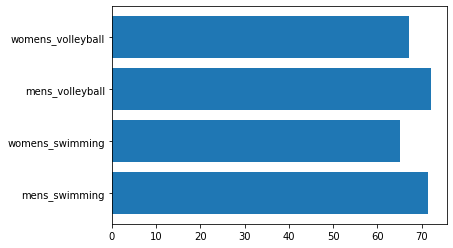

In [26]:
plt.barh(avg_hts['team'],avg_hts['avg'])
plt.show()